In [1]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]
    print(111,pose_landmarks)

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image




In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

111 [NormalizedLandmark(x=0.3355117440223694, y=0.37005776166915894, z=-0.10199826210737228, visibility=0.9999439716339111, presence=0.9999891519546509), NormalizedLandmark(x=0.3381204307079315, y=0.3638836145401001, z=-0.09025777131319046, visibility=0.9998555183410645, presence=0.9999732971191406), NormalizedLandmark(x=0.3402687609195709, y=0.3646337389945984, z=-0.09036998450756073, visibility=0.9998258948326111, presence=0.999976634979248), NormalizedLandmark(x=0.34246036410331726, y=0.36537158489227295, z=-0.09033386409282684, visibility=0.9998730421066284, presence=0.9999712705612183), NormalizedLandmark(x=0.33336693048477173, y=0.36446329951286316, z=-0.08810483664274216, visibility=0.9998977184295654, presence=0.9999628067016602), NormalizedLandmark(x=0.33170264959335327, y=0.3654601573944092, z=-0.08821745216846466, visibility=0.9999048709869385, presence=0.9999673366546631), NormalizedLandmark(x=0.3297966718673706, y=0.3661474287509918, z=-0.08826415985822678, visibility=0.99

c:\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


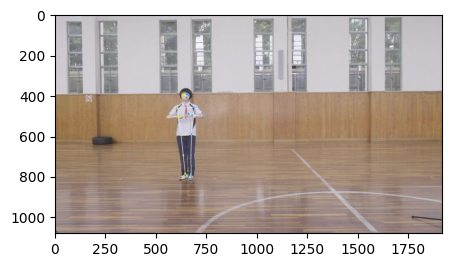

In [8]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
from matplotlib import pyplot as plt


# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("frame_0.jpeg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.figure(figsize=(5, 5))
plt.imshow(annotated_image)